# Springboard Capstone
## Analysis of characteristics of top songs on billboard from 2010 to 2019 to advise new artist on creating a hit song.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [26]:
df = pd.read_excel('topbillboardsongs.xlsx')

In [27]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


# Exploration Analysis

# Top 5 Songs

In [29]:
popular_songs = df.sort_values(by = "pop", ascending  = False)
popular_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93


# Top 5 Artists

In [30]:
popular_artists = pd.DataFrame(df["artist"].value_counts().head()).rename(columns = {"artist":"Billboard Spots"})
popular_artists

,Billboard Spots
Katy Perry,17
Justin Bieber,16
Rihanna,15
Maroon 5,15
Lady Gaga,14


# Top 5 Genres

In [33]:
popular_genres = pd.DataFrame(df["top genre"].value_counts().head().index).rename(columns = {0:"Genre"})
popular_genres.index += 1
popular_genres


,Genre
1,dance pop
2,pop
3,canadian pop
4,barbadian pop
5,boy band


# Exploring Song Characteristics Changes Over the Years


# Data Preparation 

In [34]:
time_series_df = df.set_index("year")
time_series_df.head()


,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,,,,
2010,"Hey, Soul Sister",Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
2010,Love The Way You Lie,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2010,TiK ToK,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
2010,Bad Romance,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
2010,Just the Way You Are,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78


In [36]:
time_series_df.drop(["artist", "title", "top genre"], axis = 1, inplace = True)
time_series_df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,
2010,97,89,67,-4,8,80,217,19,4,83
2010,87,93,75,-5,52,64,263,24,23,82
2010,120,84,76,-3,29,71,200,10,14,80
2010,119,92,70,-4,8,71,295,0,4,79
2010,109,84,64,-5,9,43,221,2,4,78


# Variation of the Duration Over the Years

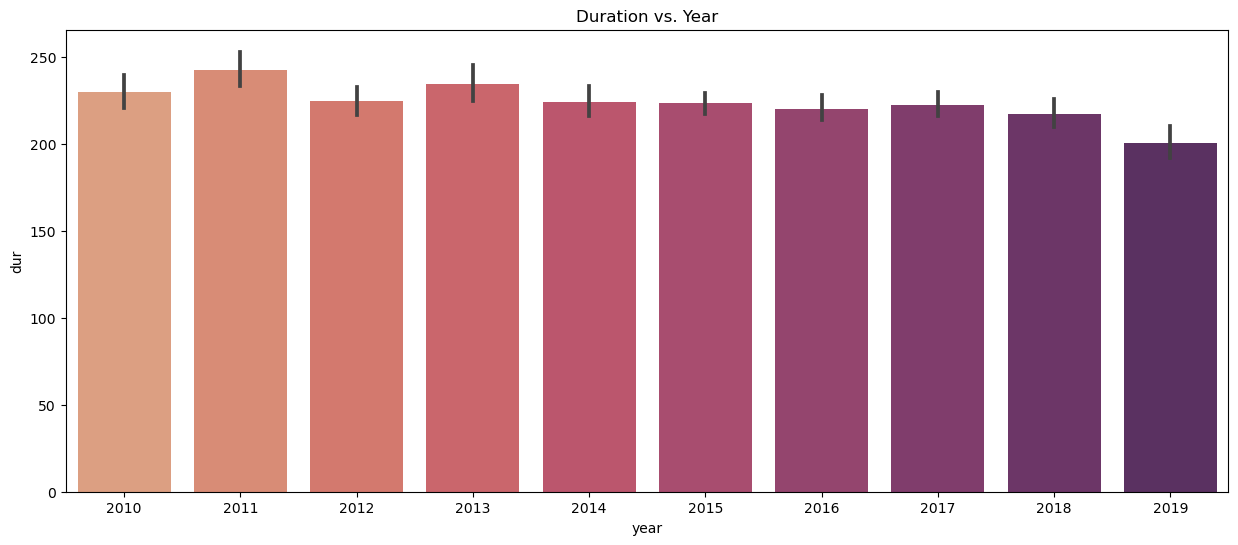

In [40]:
plt.figure(figsize = (15,6))
plot1 = sns.barplot(x = time_series_df.index, y = time_series_df["dur"], data = time_series_df, palette = "flare").set_title("Duration vs. Year")

# Variation of the Beats per minute Over the Years

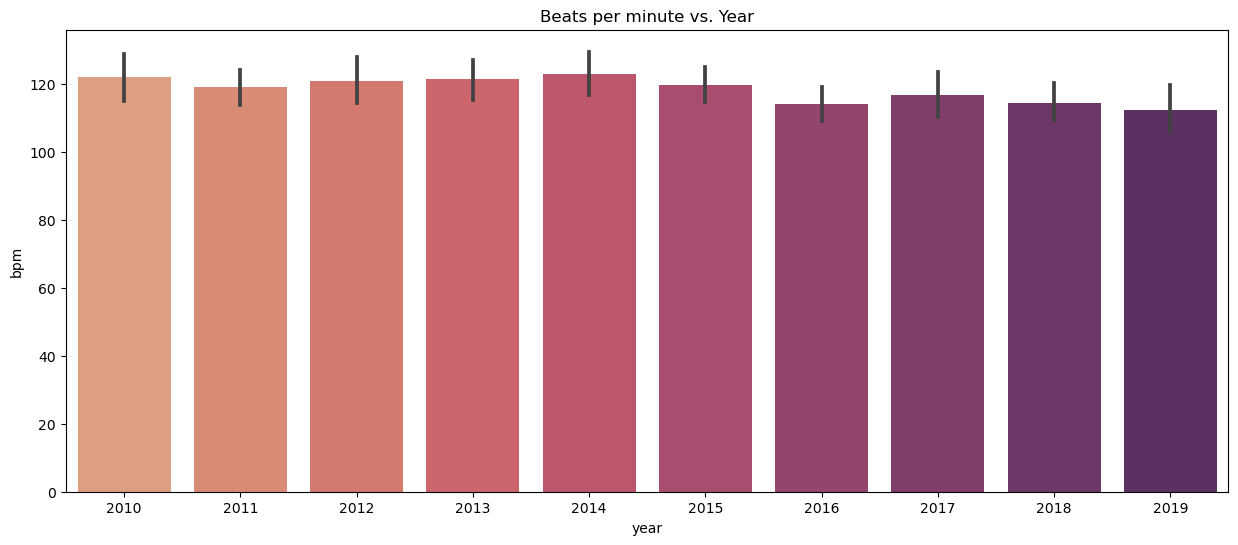

In [41]:
plt.figure(figsize = (15,6))
plot2 = sns.barplot(x = time_series_df.index, y = time_series_df["bpm"], data = time_series_df, palette = "flare").set_title("Beats per minute vs. Year")

# Variation of the Speechiness Over the Years

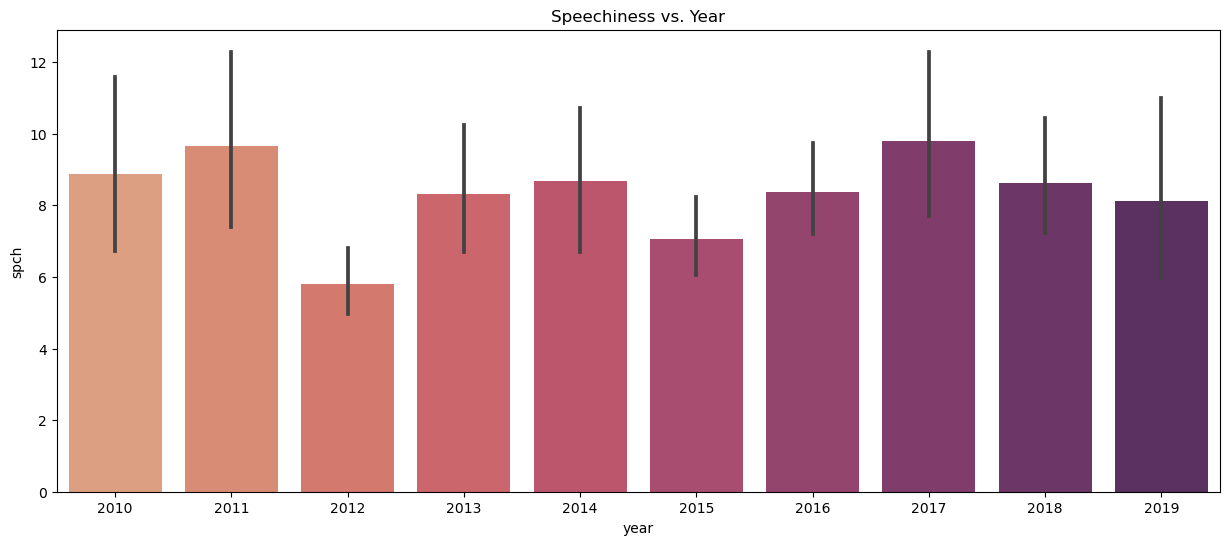

In [44]:
plt.figure(figsize = (15,6))
plot3 = sns.barplot(x = time_series_df.index, y = time_series_df["spch"], data = time_series_df, palette = "flare").set_title("Speechiness vs. Year")

# Variation of the Danceability Over the Years

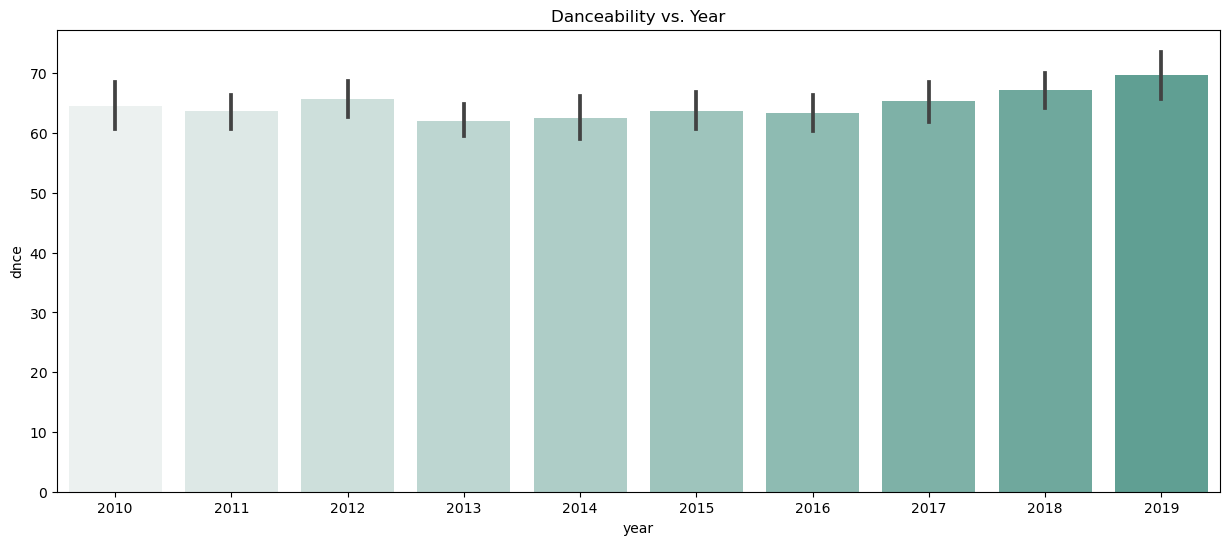

In [45]:
plt.figure(figsize = (15,6))
plot4 = sns.barplot(x = time_series_df.index, y = time_series_df["dnce"], data = time_series_df, palette = "light:#5A9").set_title("Danceability vs. Year")
 

# Variation of the Energy Over the Years

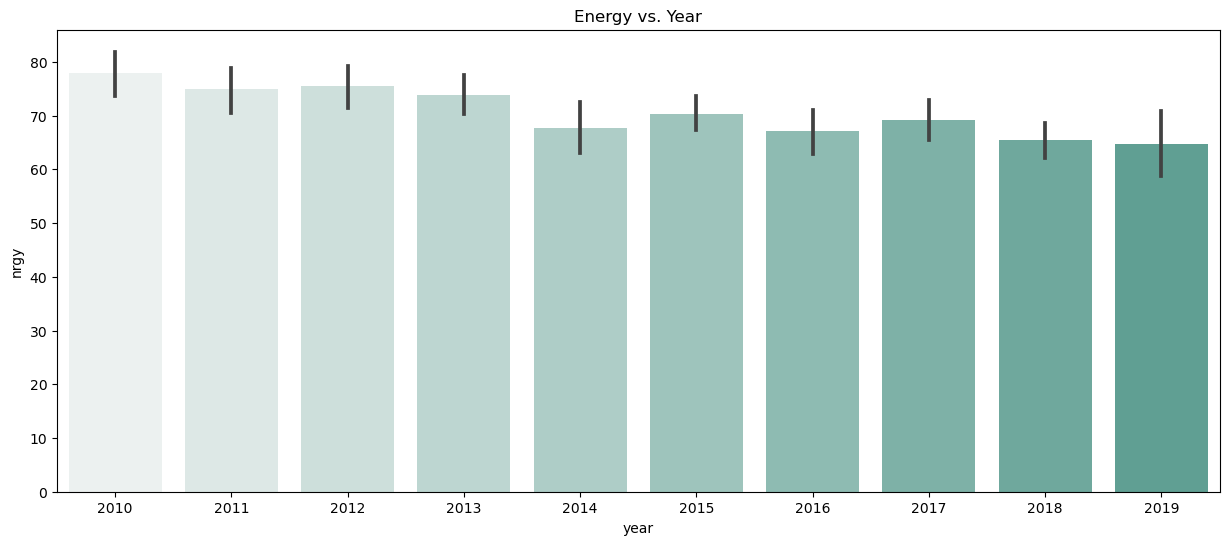

In [46]:
plt.figure(figsize = (15,6))
plot5 = sns.barplot(x = time_series_df.index, y = time_series_df["nrgy"], data = time_series_df, palette = "light:#5A9").set_title("Energy vs. Year")

# Variation of the Loudness Over the Years

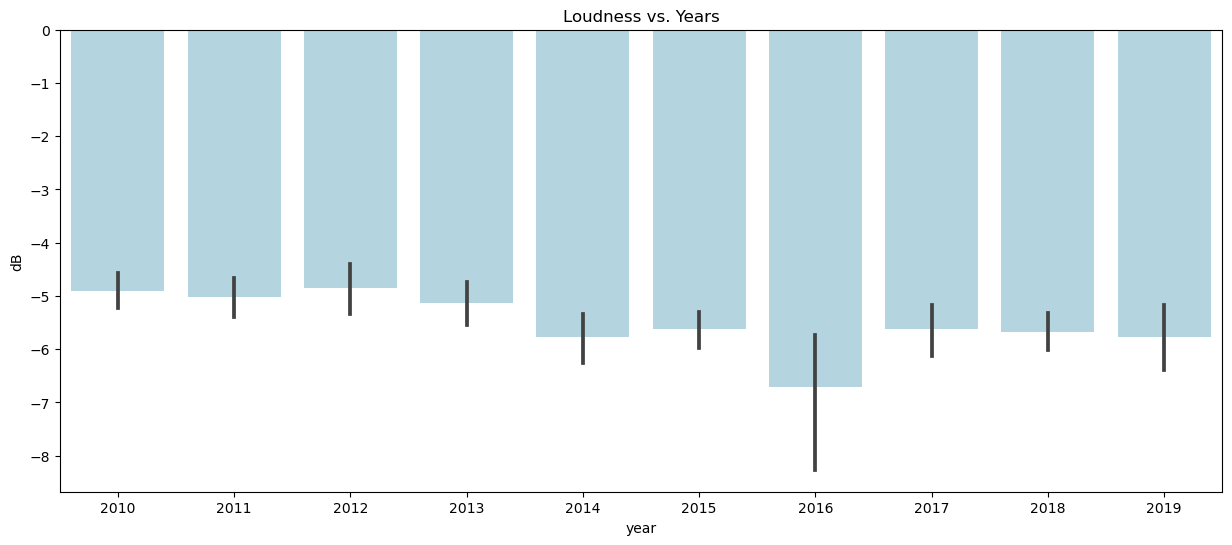

In [52]:
plt.figure(figsize=(15,6))
plot6 = sns.barplot(x=time_series_df.index, y='dB', data=time_series_df, color = "lightblue").set(title = "Loudness vs. Years")

# Variation of the Acousticness Over the Years

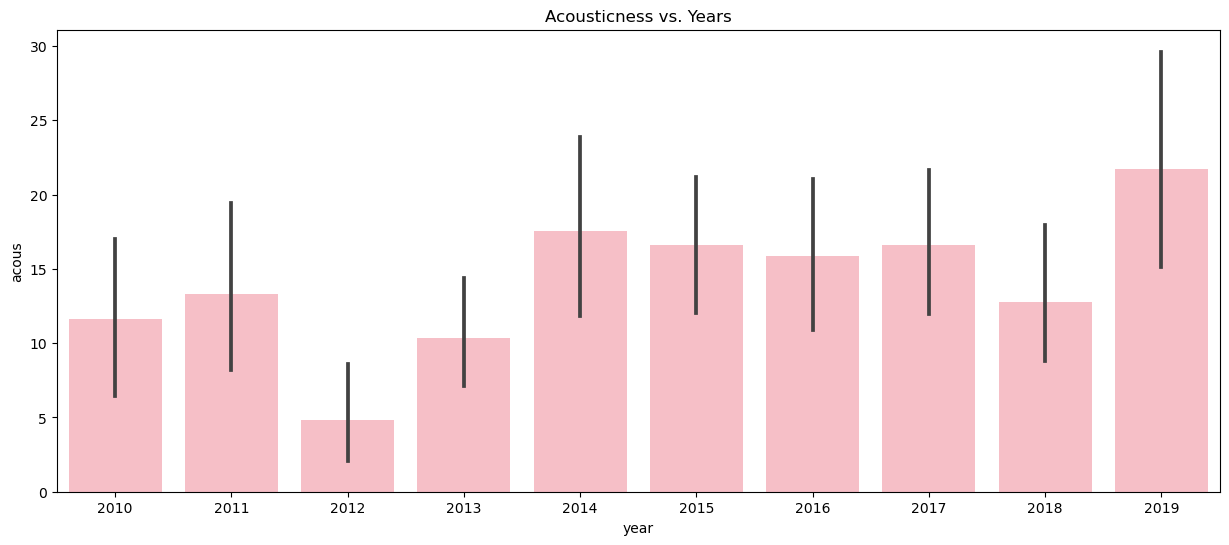

In [53]:
plt.figure(figsize=(15,6))
plot7 = sns.barplot(x=time_series_df.index, y='acous', data=time_series_df, color = "lightpink").set(title = "Acousticness vs. Years")


# Variation of the Valence Over the Years

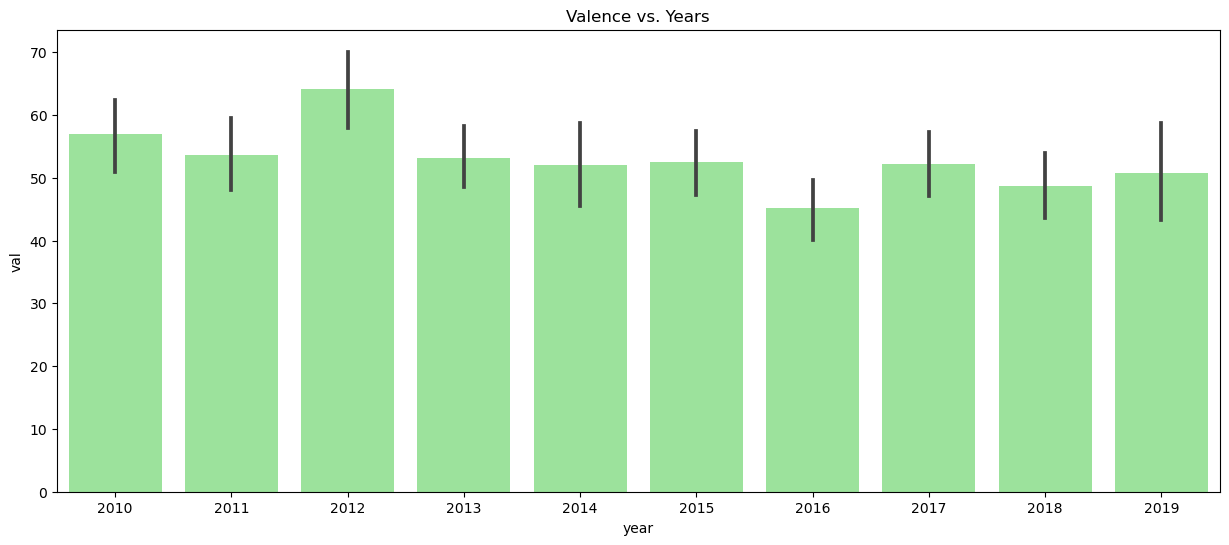

In [57]:
plt.figure(figsize=(15,6))
plot8 = sns.barplot(x=time_series_df.index, y='val', data=time_series_df, color = "lightgreen").set(title = "Valence vs. Years")

# Variation of the Liveness Over the Years

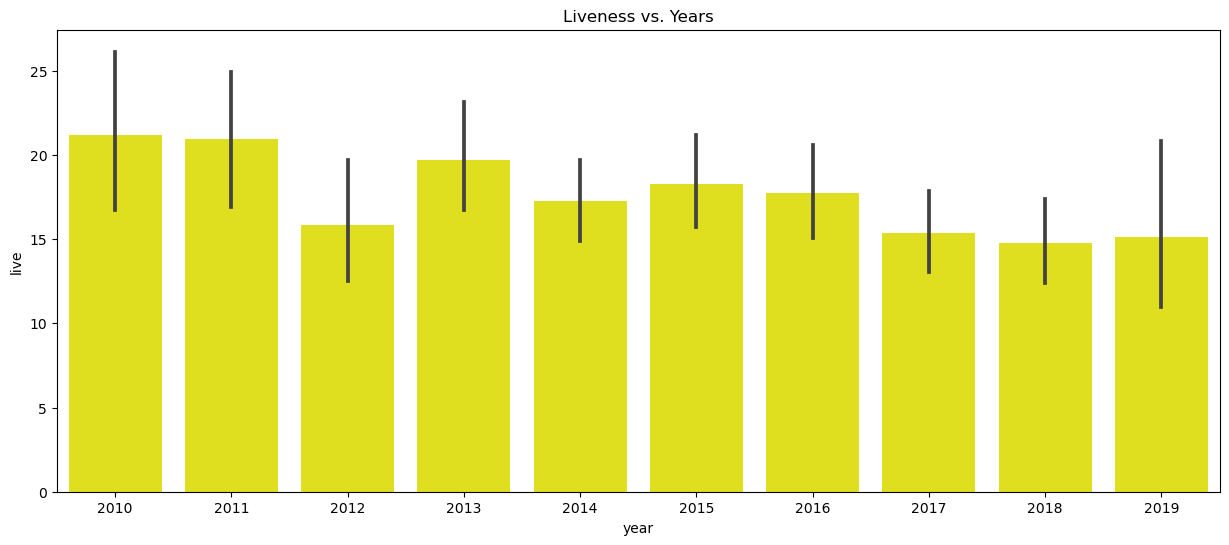

In [58]:
plt.figure(figsize=(15,6))
plot9 = sns.barplot(x=time_series_df.index, y='live', data=time_series_df, color = "yellow").set(title = "Liveness vs. Years")

## From the above plots, we notice the following trends:

### The Duration of a song is decreasing.
### The Beats Per Minute in a song are decreasing.
### The Speechiness (amount of spoken words) in a song is decreasing.
### The Loudness of a song is Decreasing.
### The Energy of a song is decreasing.
### The Liveness (likeliness of a song being recorded with live audience) of a song is fairly stable.
### The Valence (cheerfulness) of a song is increasing.
### The Danceability (easy to dance to) of a song is increasing.
### The Acousticness of a song is increasing.

# Correlations between Song Characteristics

[Text(0.5, 0, 'bpm'),
 Text(1.5, 0, 'nrgy'),
 Text(2.5, 0, 'dnce'),
 Text(3.5, 0, 'dB'),
 Text(4.5, 0, 'live'),
 Text(5.5, 0, 'val'),
 Text(6.5, 0, 'dur'),
 Text(7.5, 0, 'acous'),
 Text(8.5, 0, 'spch'),
 Text(9.5, 0, 'pop')]

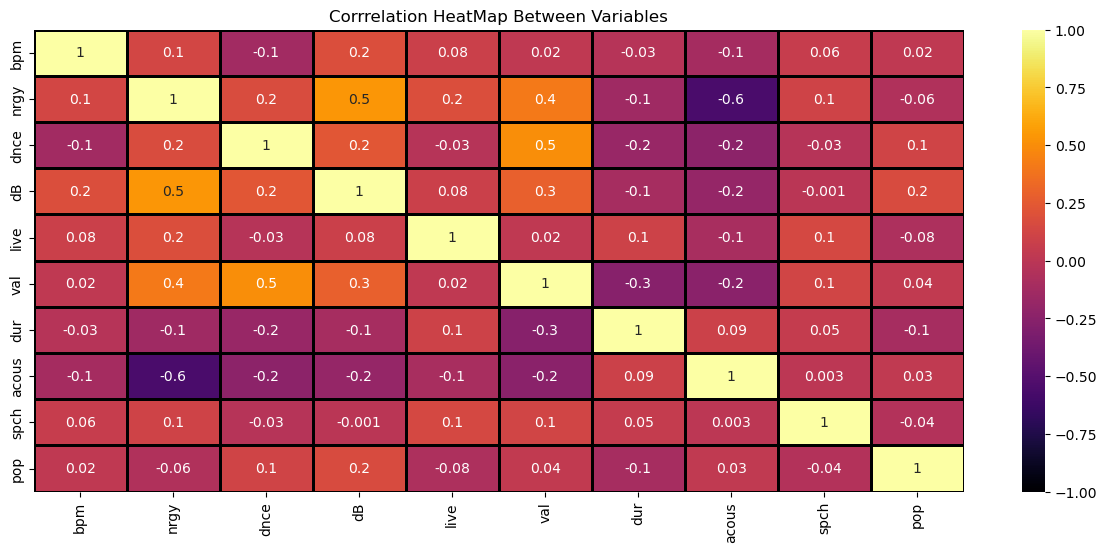

In [60]:

corr_df = df.drop(["year", "title", "artist", "top genre"], axis = 1).corr(method = "pearson")

plt.figure(figsize = (15,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor = "Black")
heatmap.set_title("Corrrelation HeatMap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

## Important Positive Correlations between song characteristics:

Valence and Energy (0.4 correlation coefficient) ----> a song being more positive (cheerful, happy) is positively correlated to the song being more energetic.

Valence and Danceability (0.5 correlation coefficient) ----> a song being more positive (cheerful, happy) is positively correlated to the song being easier to dance to.

Energy and Loudness(dB) (0.5 correlation coefficient) ----> a song having more energy is positively correlated to the song being more loud.

Valence and Loudness(dB) (0.3 correlation coefficient) ----> a song is more positive (cheerful, happy) when it is more loud. When a song is more quiet, it is to some extent, less cheerful.

Liveness and Energy (0.2 correlation coefficient) ----> a song has more energy when the likeliness that the song was recorded with a live audience is higher. A song being recorded with a live audience could result in the audience singing and shouting the lyrics, therefore, more energy.

Danceability and Energy (0.2 correlation coefficient) ----> a song is more easy to dance to when it has more energy.

## Important Negative Correlations between song characteristics:

Acousticness and Energy (-0.6 correlation coefficient) ----> a song being more acoustic has a negative correlation with its energy, the more the acousticness the less the energy.

Duration and Valence (-0.3 correlation coefficient) ----> a song being longer is resulting in the song being less positive (cheerful, happy). We can see that more clearly when we look at it from the genre point of view. For example, "Dance pop" songs are not long (short/moderate duration) but are more positive (higher valence).

Danceability and Acousticness (-0.2 correlation coefficient) ----> a song is more easy to dance to when it is less acoustic. However, the correlation coefficient is not the high so it is not always the case.

Acousticness and Loudness(dB) (-0.2 correlation coefficient) ----> a song is louder when it is less acoustic. That is expected because usually acoustic songs are more calm/quiet than electronic music.

# Correlation between Energy & Danceability

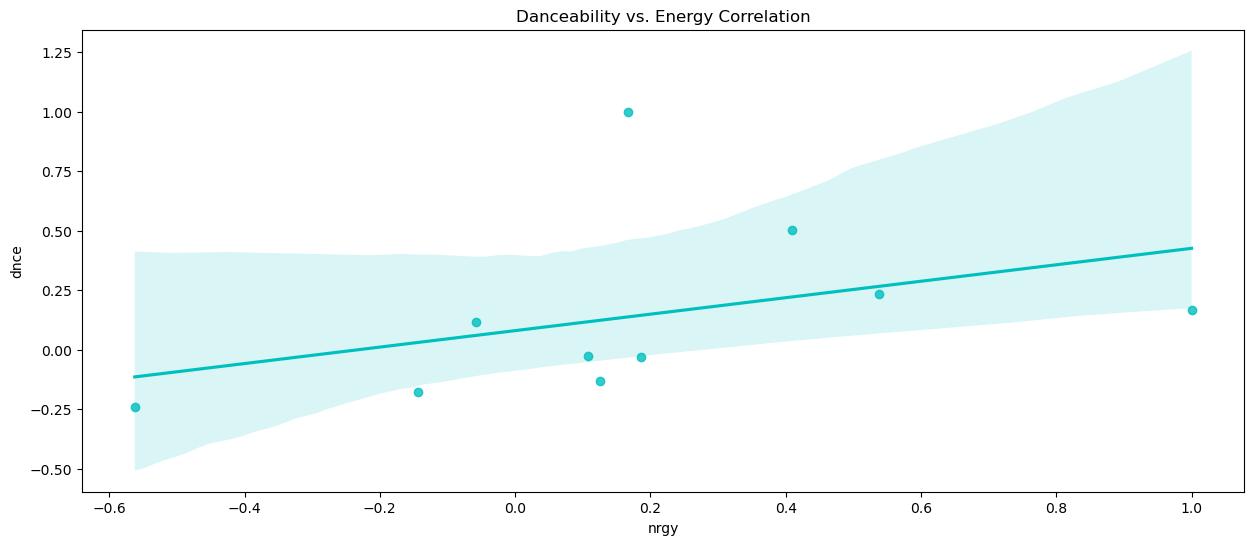

In [63]:
plt.figure(figsize=(15,6))
plot10 = sns.regplot(data = corr_df, y = "dnce", x = "nrgy", color = "c").set(title = "Danceability vs. Energy Correlation")


# Correlation between Energy & Acousticness

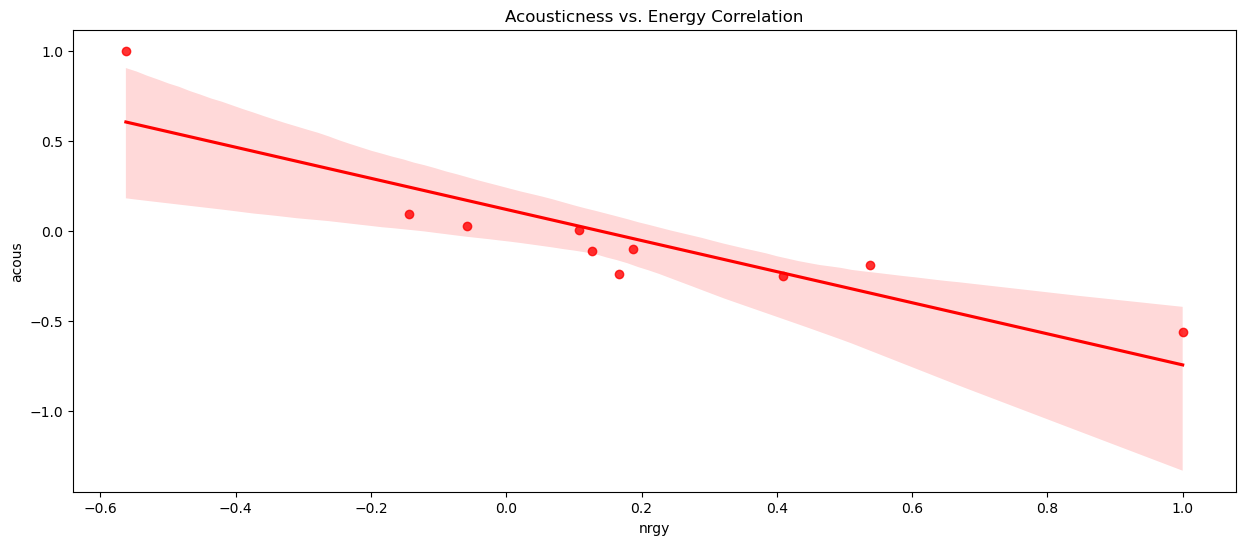

In [64]:
plt.figure(figsize=(15,6))
plot11 = sns.regplot(data = corr_df, y = "acous", x = "nrgy", color = "r").set(title = "Acousticness vs. Energy Correlation")

#### We can see the positive correlation between Danceabaility and Energy in plot10. As the energy of the song increases, the danceability increases.
#### On the other hand, we can see the negative correlation between Acousticness and Energy in plot11. As the energy increases, the acousticness of the song decreases.

### Now, we are going to narrow down our interests in the trends of music characteristics over the years, to the last 3 years. We are going to do that because a music's popularity is hugely affected by music and social media trends in every year. That is why we cannot look at the success of song in 2010 to know what to expect in 2022.
### The first step is checking the average values of each song characteristic in the last 3 years (2017, 2018, 2019). From that, we are going to verify the insights we got from the plots above, as well as have an idea to where the values are heading.

In [65]:
recent0_year_df = df[df.year == 2017].mean()[1:-1]
recent1_year_df = df[df.year == 2018].mean()[1:-1]
recent2_year_df = df[df.year == 2019].mean()[1:-1]

C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\3675110973.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  recent0_year_df = df[df.year == 2017].mean()[1:-1]
C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\3675110973.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  recent1_year_df = df[df.year == 2018].mean()[1:-1]
C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\3675110973.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, sp

In [66]:
data = {"Averages in 2017": recent0_year_df,
        "Averages in 2018": recent1_year_df,
        "Averages in 2019": recent2_year_df}

forecasting_df = pd.DataFrame(data)

forecasting_df


,Averages in 2017,Averages in 2018,Averages in 2019
bpm,116.800000,114.593750,112.451613
nrgy,69.169231,65.468750,64.741935
dnce,65.369231,67.203125,69.709677
dB,-5.615385,-5.671875,-5.774194
live,15.369231,14.750000,15.161290
val,52.276923,48.765625,50.806452
dur,222.169231,217.187500,200.645161
acous,16.600000,12.781250,21.741935
spch,9.784615,8.625000,8.129032


#### Now, and using the averages above, we are going to calculate the percentage of change these characteristics are witnessing over those 3 years. From those percentages of change between the years, we will be calculating the average percentage of change and using it for future predictions and forecasting.

In [69]:
forecasting_df["Percentage of Change 2017-2018"] = np.abs(forecasting_df["Averages in 2018"] - forecasting_df["Averages in 2017"]) / forecasting_df["Averages in 2017"] * 100

forecasting_df["Percentage of Change 2018-2019"] = np.abs(forecasting_df["Averages in 2019"] - forecasting_df["Averages in 2018"]) / forecasting_df["Averages in 2018"]*100

In [70]:
forecasting_df

,Averages in 2017,Averages in 2018,Averages in 2019,Percentage of Change 2017-2018,Percentage of Change 2018-2019
bpm,116.800000,114.593750,112.451613,1.888913,1.869332
nrgy,69.169231,65.468750,64.741935,5.349894,1.110170
dnce,65.369231,67.203125,69.709677,2.805440,3.729815
dB,-5.615385,-5.671875,-5.774194,-1.005993,-1.803963
live,15.369231,14.750000,15.161290,4.029029,2.788409
val,52.276923,48.765625,50.806452,6.716727,4.184970
dur,222.169231,217.187500,200.645161,2.242314,7.616616
acous,16.600000,12.781250,21.741935,23.004518,70.108053
spch,9.784615,8.625000,8.129032,11.851415,5.750351


In [73]:
forecasting_df["Average Percentage of Change"] = forecasting_df[["Percentage of Change 2017-2018", "Percentage of Change 2018-2019"]].mean(axis = 1)


In [74]:
forecasting_df

,Averages in 2017,Averages in 2018,Averages in 2019,Percentage of Change 2017-2018,Percentage of Change 2018-2019,Average Percentage of Change
bpm,116.800000,114.593750,112.451613,1.888913,1.869332,1.879122
nrgy,69.169231,65.468750,64.741935,5.349894,1.110170,3.230032
dnce,65.369231,67.203125,69.709677,2.805440,3.729815,3.267627
dB,-5.615385,-5.671875,-5.774194,-1.005993,-1.803963,-1.404978
live,15.369231,14.750000,15.161290,4.029029,2.788409,3.408719
val,52.276923,48.765625,50.806452,6.716727,4.184970,5.450848
dur,222.169231,217.187500,200.645161,2.242314,7.616616,4.929465
acous,16.600000,12.781250,21.741935,23.004518,70.108053,46.556285
spch,9.784615,8.625000,8.129032,11.851415,5.750351,8.800883


## Forecasting
### We are now going to use the average percentage of change to predict the increase or decrease of each music characteristic in the years of 2020, 2021, and 2022.

#### We use the following formula:

#### new value = old value + (old value * (percentage of change / 100))

In [75]:
forecasting_df["Averages in 2020"] = 0
forecasting_df["Averages in 2021"] = 0
forecasting_df["Averages in 2022"] = 0

In [76]:
forecasting_df.iloc[:,5:]

,Average Percentage of Change,Averages in 2020,Averages in 2021,Averages in 2022
bpm,1.879122,0,0,0
nrgy,3.230032,0,0,0
dnce,3.267627,0,0,0
dB,-1.404978,0,0,0
live,3.408719,0,0,0
val,5.450848,0,0,0
dur,4.929465,0,0,0
acous,46.556285,0,0,0
spch,8.800883,0,0,0


In [78]:
features = ["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"]
for feat in features:
    if forecasting_df["Averages in 2019"].loc[feat] > forecasting_df["Averages in 2018"].loc[feat]:
        forecasting_df["Averages in 2020"].loc[feat] = forecasting_df["Averages in 2019"].loc[feat] + (forecasting_df["Averages in 2019"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
    else:
        forecasting_df["Averages in 2020"].loc[feat] = forecasting_df["Averages in 2019"].loc[feat] - (forecasting_df["Averages in 2019"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
    if forecasting_df["Averages in 2020"].loc[feat] > forecasting_df["Averages in 2019"].loc[feat]:
        forecasting_df["Averages in 2021"].loc[feat] = forecasting_df["Averages in 2020"].loc[feat] + (forecasting_df["Averages in 2020"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
    else:
        forecasting_df["Averages in 2021"].loc[feat] = forecasting_df["Averages in 2020"].loc[feat] - (forecasting_df["Averages in 2020"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
    if forecasting_df["Averages in 2021"].loc[feat] > forecasting_df["Averages in 2020"].loc[feat]:
        forecasting_df["Averages in 2022"].loc[feat] = forecasting_df["Averages in 2021"].loc[feat] + (forecasting_df["Averages in 2021"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
    else:
        forecasting_df["Averages in 2022"].loc[feat] = forecasting_df["Averages in 2021"].loc[feat] - (forecasting_df["Averages in 2021"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))


C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\388919829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasting_df["Averages in 2020"].loc[feat] = forecasting_df["Averages in 2019"].loc[feat] - (forecasting_df["Averages in 2019"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[feat] / 100))
C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\388919829.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasting_df["Averages in 2021"].loc[feat] = forecasting_df["Averages in 2020"].loc[feat] - (forecasting_df["Averages in 2020"].loc[feat] * (forecasting_df["Average Percentage of Change"].loc[f

In [79]:
forecasting_df.iloc[:,5:]

,Average Percentage of Change,Averages in 2020,Averages in 2021,Averages in 2022
bpm,1.879122,110.338510,108.265114,106.230681
nrgy,3.230032,62.650750,60.627111,58.668835
dnce,3.267627,71.987530,74.339814,76.768962
dB,-1.404978,-5.855320,-5.937586,-6.021007
live,3.408719,15.678096,16.212518,16.765158
val,5.450848,53.575834,56.496172,59.575692
dur,4.929465,190.754428,181.351256,172.411609
acous,46.556285,31.864173,46.698948,68.440244
spch,8.800883,7.413606,6.761143,6.166103


#### Finally, we use the characteristics' averages of 2022 as recommendations to artists who is going to produce and release their song during that year.

In [80]:
recommended_df = forecasting_df["Averages in 2022"]
recommended_df

bpm      106.230681
nrgy      58.668835
dnce      76.768962
dB        -6.021007
live      16.765158
val       59.575692
dur      172.411609
acous     68.440244
spch       6.166103
Name: Averages in 2022, dtype: float64

### Now, as a final step in our analysis. We want to recommend the genre of the song to produce. Let's check the most popular genre.

In [81]:
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [101]:
temp_df = pd.DataFrame(df["top genre"].value_counts())
temp_df

,top genre
dance pop,327
pop,60
canadian pop,34
barbadian pop,15
boy band,15
electropop,13
british soul,11
big room,10
canadian contemporary r&b,9
neo mellow,9


In [85]:
pop_count = 0
other_count = 0
for genre in temp_df.index:
    if "pop" in genre:
        pop_count += temp_df["top genre"].loc[genre]
    else:
        other_count += temp_df["top genre"].loc[genre]

In [91]:
print("The amount of songs from the Pop genre on the billboard: ", pop_count, "Songs")
print("The amount of songs from the remaining genre on the billboard: ", other_count, "Songs")


The amount of songs from the Pop genre on the billboard:  485 Songs
The amount of songs from the remaining genre on the billboard:  118 Songs


In [110]:
percentage_pop = (pop_count * 100) / temp_df["top genre"].sum()
percentage_other = (other_count * 100) / temp_df["top genre"].sum()

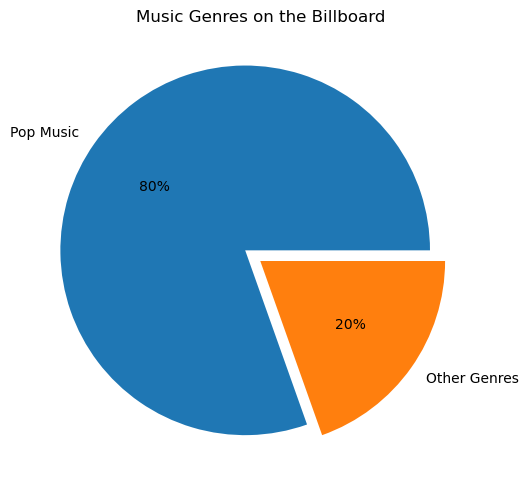

In [111]:
data = [percentage_pop, percentage_other]
keys = ["Pop Music", "Other Genres"]

explode = [0.1, 0]

plt.figure(figsize=(15,6))

plot12 = plt.pie(data, labels = keys, explode = explode, autopct='%.0f%%')
plt.title("Music Genres on the Billboard")
plt.show()

#### We notice that the most popular genre on the Billboard is Pop (80%), in all its sub-categories (Dance Pop, Candian Pop, Barbadian Pop, etc.). With that being said, lets check if the song characteristics of Pop music in 2019 is close to the characteristics recommended to the artist.

#### Each genre has certain characteristics, some genres alwasy have songs of a short duration. Electronic music for example, it has a higher bpm than country music etc.

#### So we do need to check if our recommendations match, or even correspond, to the desired genre.

In [113]:
genre_pop_2019 = df[(df["top genre"] == "pop") & (df["year"] == 2019)]

In [114]:
genre_df = pd.DataFrame(genre_pop_2019.mean()[1:-1])

C:\Users\bmish\AppData\Local\Temp\ipykernel_7624\2808795094.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genre_df = pd.DataFrame(genre_pop_2019.mean()[1:-1])


In [115]:
genre_df.rename(columns = {0:"Average Pop Characteristics in 2019"}, inplace = True)

In [116]:
genre_df["Recommended Characteristics in 2022"] = recommended_df
genre_df

,Average Pop Characteristics in 2019,Recommended Characteristics in 2022
bpm,108.555556,106.230681
nrgy,61.222222,58.668835
dnce,70.666667,76.768962
dB,-6.111111,-6.021007
live,12.111111,16.765158
val,60.000000,59.575692
dur,199.888889,172.411609
acous,33.444444,68.440244
spch,7.777778,6.166103


#### From the above 2 columns, we notice that the characteristics are very similar. For instance, the bpm, energy, dB, valence, and speechiness are almost the same. Moreover, characteristics such as the duration are close but not exactly the same, and that is okay because an extra 20 seconds won't make the song correspond to a whole other genre.

#### Moreover, the liveness of a song can also vary a bit and it is also acceptable since the liveness can be ignored if our friend does not mind the place of production not being in front of live audience.

#### Now for the acousticness, the average pop acousticness in 2018 was approximately 16. in 2019, it was approximately 33, and in 2022 it reaches 68. Due to the strictly increasing plot of the acousticness over the last couple of years, it is understandable that it might also double, just like it doubled from 2018 to 2019.

## Resulting Recommendations

### Characteristics	Recommendations
##### Beats per Minute:	106
##### Energy:	59
##### Danceability:	77
##### Loudness (dB):	-6
##### Liveness:	17
##### Valence:	60
##### Duration (sec):	172
##### Acousticness:	68
##### Speechiness:	6
##### Genre	:    Pop